In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel('global_laptop_selling_data.xlsx')

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Analysis

In [5]:
df.shape

(1303, 13)

In [6]:
df.drop('laptop_ID',axis=1, inplace=True)

In [7]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
df.shape

(1303, 12)

In [9]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 106
OpSys                 9
Weight              179
Price_euros         791
dtype: int64

In [11]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [12]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(1275, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB


In [16]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [17]:
df.Product.unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [18]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [19]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [20]:
df.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [21]:
df.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [22]:
df.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [23]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AMD Ra

In [24]:
df.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

# Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [43]:
le = LabelEncoder()

In [45]:
for col in df.columns:
    if is_numeric_dtype(df[col]) :
        continue
    else:
            df[col] = le.fit_transform(df[col])

In [46]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [47]:
df.shape

(1275, 12)

# Visualization

In [48]:
df1=pd.read_excel('global_laptop_selling_data.xlsx')

In [49]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<Axes: title={'center': 'Correlation of Features'}>

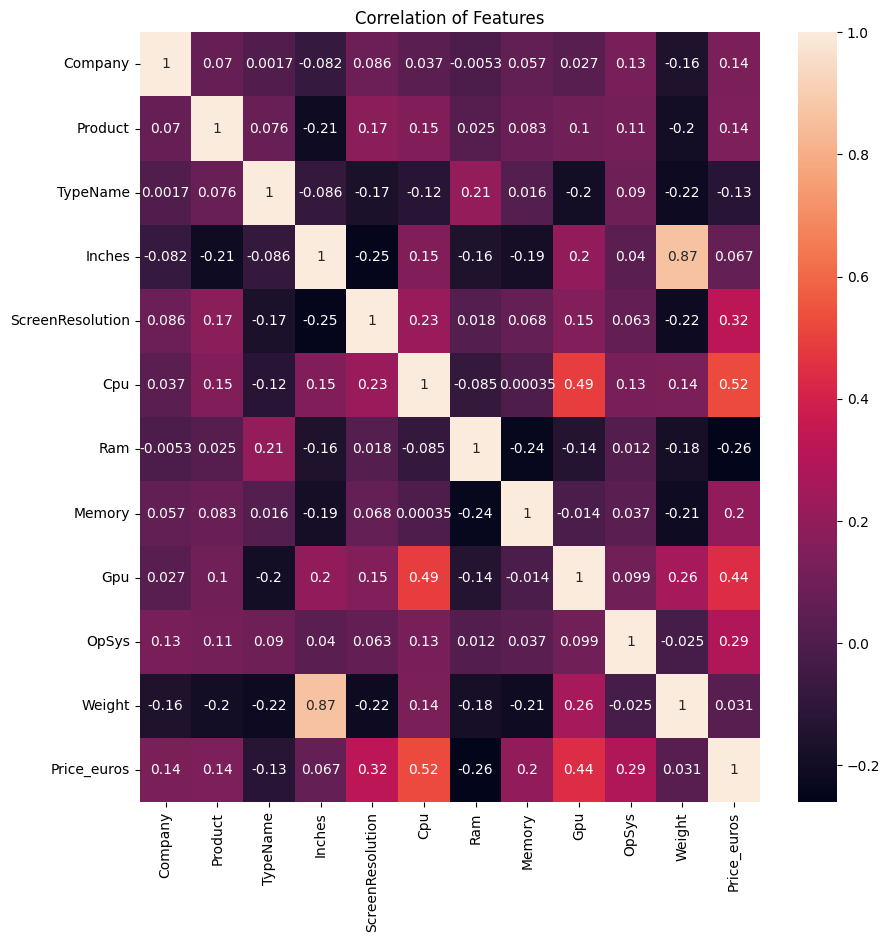

In [50]:
plt.figure(figsize=(10,10))
plt.title('Correlation of Features')
sns.heatmap(df.corr(),annot=True)


# Train_Test_split

In [65]:
from sklearn.model_selection import train_test_split as tts

In [66]:
x=df.drop('Price_euros',axis=1)
y= df['Price_euros']

In [67]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=38)

# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lreg = LinearRegression()

In [70]:
lreg.fit(xtrain,ytrain)

LinearRegression()

# Error

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [74]:
pred = lreg.predict(xtest)

In [75]:
lr_mse =mean_squared_error(ytest,pred)

In [76]:
lr_mse

243988.54500117004

In [77]:
lr_mae = mean_absolute_error(ytest,pred)

In [78]:
lr_mae

374.540684547206

# Accuracy

In [79]:
from sklearn.metrics import r2_score

In [80]:
lr_acc = r2_score(ytest,pred)

In [81]:
lr_acc

0.45976625589835407

# KNN

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
ne =KNeighborsRegressor(n_neighbors = 3)

In [117]:
ne.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [118]:
knn_pred = ne.predict(xtest)

In [119]:
knn_acc=r2_score(ytest,knn_pred)

In [120]:
knn_acc

0.683061849019712

In [121]:
knn_mse =mean_squared_error(ytest,knn_pred)

In [122]:
knn_mse

143140.4075686394

In [123]:
knn_mae = mean_absolute_error(ytest,knn_pred)

In [124]:
knn_mae

241.8672845953003

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [155]:
dt = DecisionTreeRegressor(random_state=72)

In [156]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=72)

In [157]:
dt_pred = dt.predict(xtest)

In [158]:
dt_acc = dt.score(xtest,ytest)

In [159]:
dt_acc

0.654642236030277

In [160]:
dt_mse = mean_squared_error(ytest,dt_pred)

In [161]:
dt_mse

155975.7035835509

In [162]:
dt_mae = mean_absolute_error(ytest,dt_pred)

In [163]:
dt_mae

252.06942558746735

# Random Forest

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
rf = RandomForestRegressor(n_jobs=-1, random_state=65)

In [166]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_jobs=-1, random_state=65)

In [167]:
rf_pred = rf.predict(xtest)

In [168]:
rf_acc = rf.score(xtest,ytest)

In [169]:
rf_acc

0.8016277214625334

In [170]:
rf_mse = mean_squared_error(ytest,rf_pred)

In [171]:
rf_mse

89591.89265270454

In [172]:
rf_mae = mean_absolute_error(ytest,rf_pred)

In [173]:
rf_mae

184.37706560922538

# SVR

In [174]:
from sklearn.svm import SVR

In [175]:
svr = SVR(kernel='linear')

In [176]:
svr.fit(xtrain,ytrain)

SVR(kernel='linear')

In [177]:
svr_pred = svr.predict(xtest)

In [185]:
svr_acc = svr.score(xtest,ytest)

In [186]:
svr_acc

0.4266269681098994

In [187]:
svr_mse = mean_squared_error(ytest,svr_pred)

In [188]:
svr_mse

258955.41202523137

In [189]:
svr_mae = mean_absolute_error(ytest,svr_pred)

In [190]:
svr_mae

362.6164286494706

# Accuracy comparison

In [192]:
data = pd.DataFrame({'Models':['Random forest','Decision Tree','Linear Regression','KNN regression','Support Machine regression'],
       'Accuracy': [rf_acc,dt_acc,lr_acc,knn_acc,svr_acc],
        'MAE': [rf_mae,dt_mae,lr_mae,knn_mae,svr_mae],
        'MSE': [rf_mse,dt_mse,lr_mse,knn_mse,svr_mse]})
data.head()

,Models,Accuracy,MAE,MSE
0,Random forest,0.801628,184.377066,89591.892653
1,Decision Tree,0.654642,252.069426,155975.703584
2,Linear Regression,0.459766,374.540685,243988.545001
3,KNN regression,0.683062,241.867285,143140.407569
4,Support Machine regression,0.426627,362.616429,258955.412025
